# **MÓDULO 15 - Exercício**
## Análise  - A segunda etapa da Pré Modelagem
### **Objetivos**
##### 1)Save and read da base de dados
Salvar a base de dados pré-processada do modulo 14 e ler para esta atividade. 
##### 2) Análise univariada:
* A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.
* B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?
* C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.
* D) Verifique se os dados das variáveis Booleanas são balanceados ou não.
##### 3)  Analise de outliers.
Identificar e trate as colunas que contém e caso opte por mante-los ou altera-los justifique sua escolha.
##### 4) Análise bivariada:
* A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.
* B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?


### **Resumo do pré-processamento anterior**
1) Todas variaves string do Dataframe foram convertidadas em minúsculas;
2) Respostas yes/No foram convertidas em 1-0 inteiros;
3) 4 colunas apresentaram valores nulos **Genero (12)**, **PhoneService (1482)**, **Pagamento_Mensal (325)** e **Churn (5)**;
4) As linhas Nulas de **Genero(12)** e **Churn(5)** foram excluidas serem menores que 5% do total;
5) As linhas Nulas de **Pagamento_Mensal (325)** foram subtituidas pela mediana dos devido os dados não serem normais e mediana> media;
6) A coluna **PhoneService** foi excluida por não ter correlacao com **Churn**;
7) Generos foram classificadas em female e male;
#### Estrutura do DataFrame final

| Coluna               | Contagem de Não Nulos | Tipo de Dado |
|----------------------|----------------------|-------------|
| customerID          | 2488 non-null       | object      |
| Genero              | 2488 non-null       | object      |
| Idoso               | 2488 non-null       | int64       |
| Casado              | 2488 non-null       | int64       |
| Dependents          | 2488 non-null       | int64       |
| Tempo_como_Cliente  | 2488 non-null       | int64       |
| Servico_Internet    | 2488 non-null       | object      |
| Servico_Seguranca   | 2488 non-null       | object      |
| Suporte_Tecnico     | 2488 non-null       | object      |
| StreamingTV         | 2488 non-null       | object      |
| Tipo_Contrato       | 2488 non-null       | object      |
| PaymentMethod       | 2488 non-null       | object      |
| Pagamento_Mensal    | 2488 non-null       | float64     |
| Total_Pago          | 2488 non-null       | float64     |
| Churn               | 2488 non-null       | int64       |
**Tabela 1:** Dataframe anterior

In [422]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
from scipy.stats import skew, kurtosis

### **1-Leitura dos dados**

In [423]:
df = pd.read_csv("CHURN_TELECON_MOD08_preprocessed.csv", delimiter=',')
df.head(10)
df['Idoso'].value_counts()

Idoso
0    2086
1     402
Name: count, dtype: int64

### **2- Analise univariada**
>**Importante:**\
>a) Utilize a função describe no seu dataframe, veja os insights que consegue retirar\
>b) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?\
>c)Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn).\
>d) Verifique se os dados das variáveis Booleanas são balanceados ou não.

Em nosso conjunto de dados atuais, temos 3 grupos de dados:
* 1) 3 colunas numéricas: **Tempo_como_Cliente**, **Pagamento_Mensal**, **Total_Pago**
* 2) 8 colunas Booleanas: **Idoso**, **casado**, **Dependents**, **Servico_Seguranca**, **Suporte_Tecnico**	**StreamingTV**, **Churn**,**Servico_Internet**
* 3) 5 colunas categoricas: **customerID**, **Genero**, **Servico_Internet**, **Tipo_Contrato**, **PaymentMethod**\

**Observação:** Aqui colocamos serviço de internet em dois conjuntos, pois num primeiro momento, estamos interessados apenas se há serviço de internet ou não, e posteriomente classificar qual o serviço.

#### 1) Colunas númericas

Observamos na tabela 2 o resultado da função **describe** das colunas numéricas do dataset:
<a id="tabela-exemplo"></a>
| Estatística | Tempo_como_Cliente(mese) | Pagamento_Mensal | Total_Pago  |
|------------|-------------------|------------------|-------------|
| Contagem (count)      | 2488.000000       | 2488.000000      | 2488.000000 |
| Média (mean)       | 32.352090         | 66.342564        | 2290.087178 |
| Desvio Padrão (std)       | 24.636885         | 28.051718        | 2264.585643 |
| Mínimo (min)        | 0.000000          | 18.400000        | 18.800000   |
| 1º Quartil (25%)        | 8.000000          | 45.400000        | 402.337500  |
| Mediana (50%)        | 29.000000         | 71.450000        | 1402.900000 |
| 3º Quartil (75%)        | 56.000000         | 87.712500        | 3867.162500 |
| Máximo (max)        | 72.000000         | 118.650000       | 8564.750000 |
| Moda | 1| 71.45 |20.2|
**Tabela 2**: Resumo estatístico. 

Observamos que todas as 3 colunas, a priori, não apresentam um distribuição normal. Média e mediana não não são iguais, o que nós aponta para que os dados não seguem uma distribuição normal. A plotagem das distribuiçções além do teste Kolmogorov-Smirnov confirmaram este ponto. Um dado que chamou atenção foi a distribuição para a coluna **Total_Pago**. Observamos que cerca de 60% de da distribuição concentra-se  em valores abaixo de 2000. Ainda que esta parcela seja removida, os dados apesar de apresentar uma distribuição mais aproximada, não é normal. A tabela 3 mostra a estatisca para esses valores.
| Estatística | Valor |
|------------|----------------|
| Contagem (count) | 1003 |
| Média (mean) | 4645.74 |
| Desvio Padrão (std) | 1710.24 |
| Mínimo (min) | 2001.00 |
| 1º Quartil (25%) | 3143.43 |
| Mediana (50%) | 4590.35 |
| 3º Quartil (75%) | 5940.95 |
| Máximo (max) | 8564.75 |
**Tabela 3:**: Resumo estatístico para Total Pago > 2000

In [435]:
#describe de variaveis numéricas.
df[['Tempo_como_Cliente', 'Pagamento_Mensal', 'Total_Pago']].describe()

,Tempo_como_Cliente,Pagamento_Mensal,Total_Pago
count,2488.000000,2488.000000,2488.000000
mean,32.352090,66.342564,2290.087178
std,24.636885,28.051718,2264.585643
min,0.000000,18.400000,18.800000
25%,8.000000,45.400000,402.337500
50%,29.000000,71.450000,1402.900000
75%,56.000000,87.712500,3867.162500
max,72.000000,118.650000,8564.750000


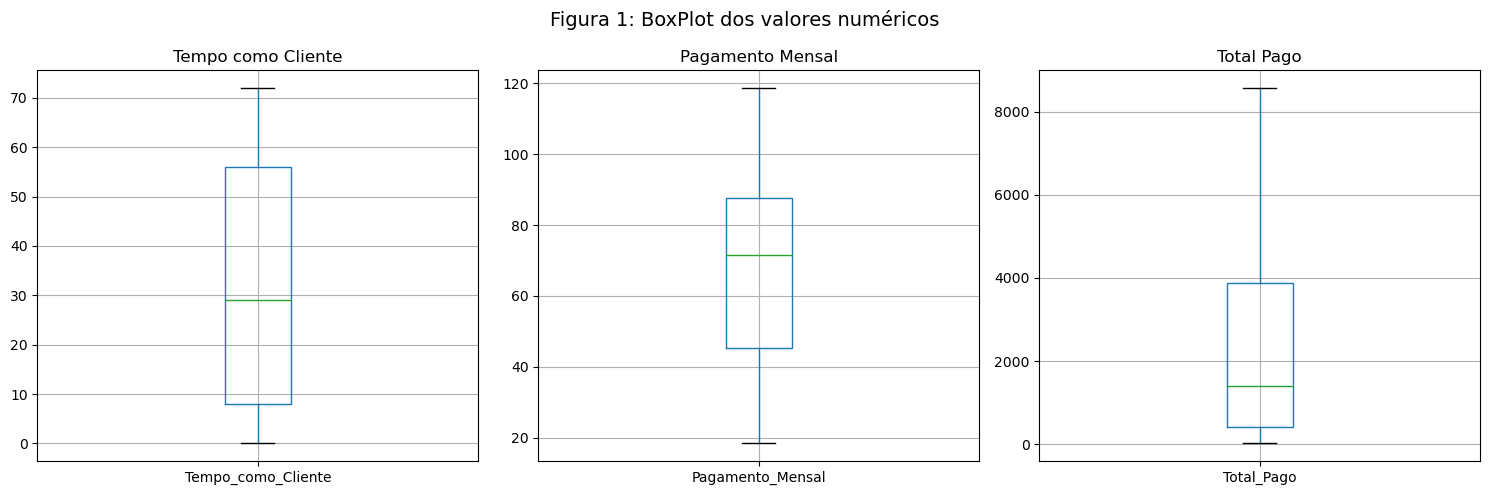

In [436]:
#Boxplot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # 1 linha, 3 colunas, tamanho da figura
fig.suptitle('Figura 1: BoxPlot dos valores numéricos', fontsize=14)

# Plotando os boxplots em cada subplot
df.boxplot(column='Tempo_como_Cliente', ax=ax[0])
df.boxplot(column='Pagamento_Mensal', ax=ax[1])
df.boxplot(column='Total_Pago', ax=ax[2])

# Ajustando os títulos dos subplots
ax[0].set_title('Tempo como Cliente')

ax[1].set_title('Pagamento Mensal')
ax[2].set_title('Total Pago')

# Exibindo os gráficos
plt.tight_layout()
plt.show()

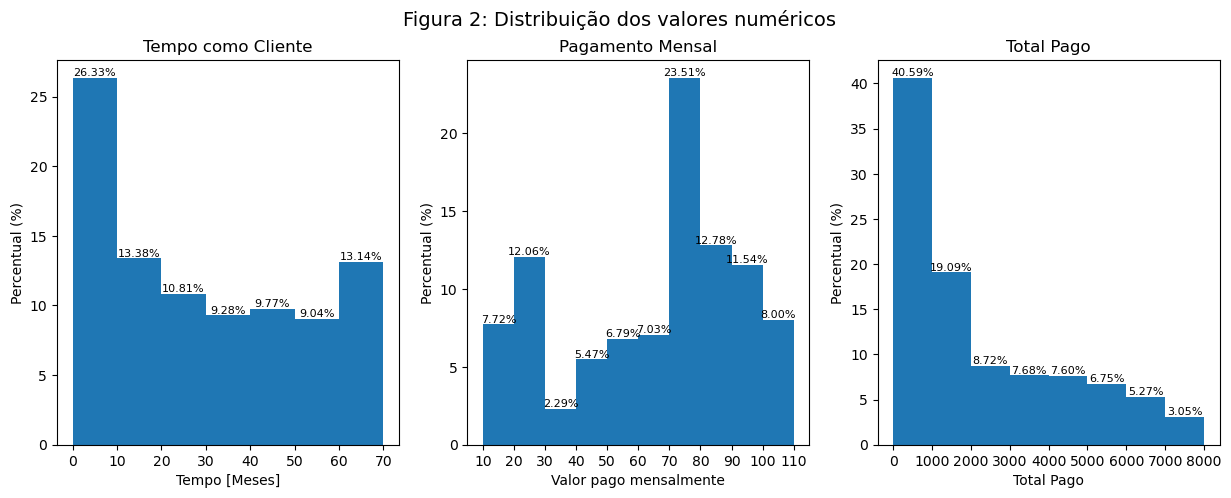

In [465]:
#histogramas
fig, ax = plt.subplots(1, 3, figsize=(15, 5)) 
fig.suptitle('Figura 2: Distribuição dos valores numéricos', fontsize=14)

temp=df['Tempo_como_Cliente']
bins=np.arange(0,80,10)

c, x= np.histogram(temp, bins)
N=len(df)
p=c/N*100
ax[0].bar(x[0:-1], p, width=np.diff(bins), align='edge')  
ax[0].set_title('Tempo como Cliente')
ax[0].set_xlabel('Tempo [Meses]')
ax[0].set_ylabel('Percentual (%)')
ax[0].set_xticks(bins)
for i in range(len(c)):
    ax[0].text(x[i]+5, p[i] , f'{p[i]:.2f}%', ha='center', va='bottom', fontsize=8)

temp=df['Pagamento_Mensal']
bins=np.arange(10,120,10)

c, x= np.histogram(temp, bins)
N=len(df)
p=c/N*100
ax[1].bar(x[0:-1], p, width=np.diff(bins), align='edge')  
ax[1].set_title('Pagamento Mensal')
ax[1].set_xlabel('Valor pago mensalmente')
ax[1].set_ylabel('Percentual (%)')
ax[1].set_xticks(bins)
for i in range(len(c)):
    ax[1].text(x[i]+5, p[i] , f'{p[i]:.2f}%', ha='center', va='bottom', fontsize=8)

temp=df['Total_Pago']
bins=np.arange(0,9000,1000)
c, x= np.histogram(temp, bins)
N=len(df)
p=c/N*100
ax[2].bar(x[0:-1], p, width=np.diff(bins), align='edge')  
ax[2].set_title('Total Pago')
ax[2].set_xlabel('Total Pago')
ax[2].set_ylabel('Percentual (%)')
ax[2].set_xticks(bins)
for i in range(len(c)):
    ax[2].text(x[i]+500, p[i] , f'{p[i]:.2f}%', ha='center', va='bottom', fontsize=8)    

##### **Teste estatístico Kolmogorov-Smirnov**
Avaliar a normalidade das seguintes distribuições com significancia de 5%. O resultado é apresentado abaixo

| Teste KS                     | Assimetria  | Curtose  | Estatística KS | Valor p                 | Conclusão |
|------------------------------|------------|---------|---------------|-------------------------|------------|
| **Tempo como Cliente**       | 0.2448     | -1.3839 | 0.1135        | 2.18e-28                | Dados NÃO seguem distribuição normal |
| **Pagamento Mensal**         | -0.3747    | -0.9534 | 0.1452        | 3.11e-46                | Dados NÃO seguem distribuição normal |
| **Total Pago**               | 0.9364     | -0.3061 | 0.1612        | 5.85e-57                | Dados NÃO seguem distribuição normal |
| **Total Pago > 2000**        | 0.2845     | -0.9216 | 0.0721        | 5.63e-05                | Dados NÃO seguem distribuição normal |
**Tabela 4** : Resultado do teste Kolmogorov-Smirnov 


In [438]:
#teste estatistico Kolmogorov-Smirnov
from scipy.stats import kstest

def teste_KS(dados):
    '''
    Hipotese nula Ho:     '''
    ks_statistic, p_valor = kstest(dados, 'norm', args=(np.mean(dados), np.std(dados)))
   # ks_statistic, p_valor = kstest(dados, 'expon') #, args=(np.mean(dados), np.std(dados)))
    assimetria = skew(dados)
    curtose = kurtosis(dados)

    print(f"assimetria : {assimetria }")
    print(f"curtose: {curtose}")
    print(f"Estatística KS: {ks_statistic}")
    print(f"Valor p: {p_valor}")

   
    alpha = 0.05  # Nível de significância de 5%
    if p_valor < alpha:
        print("Rejeitamos a hipótese nula: os dados NÃO seguem uma distribuição normal.")
    else:
        print("Não rejeitamos a hipótese nula: os dados seguem uma distribuição normal.")
    print('-' * 70)
print('Teste KS: Tempo como Cliente')
teste_KS(df['Tempo_como_Cliente'])
print('Teste KS: Pagamento Mensal')
teste_KS(df['Pagamento_Mensal'])
print('Teste KS: Total Pago:')
teste_KS(df['Total_Pago'])        

Teste KS: Tempo como Cliente
assimetria : 0.24476478182333972
curtose: -1.3839261100325009
Estatística KS: 0.11352496385771532
Valor p: 2.181671797158078e-28
Rejeitamos a hipótese nula: os dados NÃO seguem uma distribuição normal.
----------------------------------------------------------------------
Teste KS: Pagamento Mensal
assimetria : -0.3746648993893217
curtose: -0.9533763497258412
Estatística KS: 0.1451894741978058
Valor p: 3.105378669667121e-46
Rejeitamos a hipótese nula: os dados NÃO seguem uma distribuição normal.
----------------------------------------------------------------------
Teste KS: Total Pago:
assimetria : 0.9364345796123691
curtose: -0.30611161378776064
Estatística KS: 0.16120978878838133
Valor p: 5.854572559398505e-57
Rejeitamos a hipótese nula: os dados NÃO seguem uma distribuição normal.
----------------------------------------------------------------------


Teste KS: Total Pago <2000:
assimetria : 0.2844770734498954
curtose: -0.9216468933841231
Estatística KS: 0.07206990719628392
Valor p: 5.634453400652933e-05
Rejeitamos a hipótese nula: os dados NÃO seguem uma distribuição normal.
----------------------------------------------------------------------


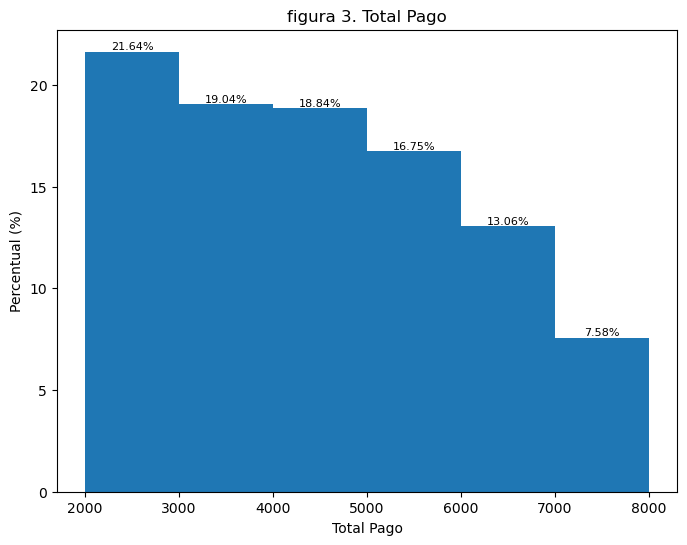

In [439]:
#filtragem total pago Maior que 2000
df2000=df[df['Total_Pago']>2000]
# #teste de normalidade dos dados
print('Teste KS: Total Pago <2000:')
teste_KS(df2000['Total_Pago'])  
#plotagem do histograma
fig = plt.subplots(figsize=(8, 6))
bins=np.arange(2000,9000,1000)
c, x= np.histogram(df2000['Total_Pago'], bins)
N=len(df2000)
p=c/N*100
plt.bar(x[0:-1], p, width=np.diff(bins), align='edge')  
plt.title('figura 3. Total Pago')
plt.xlabel('Total Pago')
plt.ylabel('Percentual (%)')
plt.xticks(bins)
for i in range(len(c)):
    plt.text(x[i]+500, p[i] , f'{p[i]:.2f}%', ha='center', va='bottom', fontsize=8)
plt.show()


#### 2) Colunas Booleanas
Para avaliar estes dados, a primeira pergunta a ser respondia é qual o percentual dos clientes tem ou não internet, sem qualificar o tipo de internet usada. Assim observamos que 78.8% dos clientes possuem serviço de internet e apenas 21.1% não possuem qualquer serviço de internet(figura 4). Desta forma classificamos nossa base a seguir em dois grupos com internet e sem internet.

##### **Com Internet**:
Para este grupo avaliamos  observamos que a maioria dos clientes não é idoso(80%), não possuem dependentes(71.7%) e não utilizam serviço de segurança(63.9%) ou suporte Técnico(63.7%). Além disso, solteiros(50.7%) e casados(49.3%) estão equilibrados. Observamos que aproximadamentes metade dos clientes(48.95%) contrata algum serviço de streaming. Em relação ao churn, apenas 31% do clientes estão com churn. Os dados estão resumidos nas tabelas 4 abaixo e nos gráficos da figura 5.

| Categoria            | Não      | Sim     |
|----------------------|------------|------------|
| Idoso               | 80.27       | 19.73      |
| Casado              | 50.69       | 49.31      |
| Dependents          | 71.75       | 28.25      |
| Churn               | 68.64       | 31.36      |
| Servico_Seguranca   | 63.95       | 36.05      |
| Suporte_Tecnico     | 63.74       | 36.26      |
| StreamingTV         | 51.05       | 48.95      |
**Tabela 5**: Clientes com  serviço de internet
##### **Sem Internet**
Primeiramente, a grande maioria desses clientes não são idosos, representando 97.15% do total, a proporção entre clientes casados e solteiros está novamente equilibrada, com 50.85% não casados e 49.15% casados. Em relação ao dependentes, há uma ligeiro aumento a não ter dependentes (56%). Em relação ao churn, apenas 6% do clientes estão com churn. Os dados estão resumidos nas tabelas 4 abaixo e nos gráficos( figura 6) a seguir

| Categoria            | Não      | Sim      |
|----------------------|------------|------------|
| Idoso               | 97.15       | 2.85       |
| Casado              | 50.85       | 49.15      |
| Dependents          | 56.55       | 43.45      |
| Churn               | 93.93       | 6.07       |
**Tabela 6**: Clientes sem serviço internet


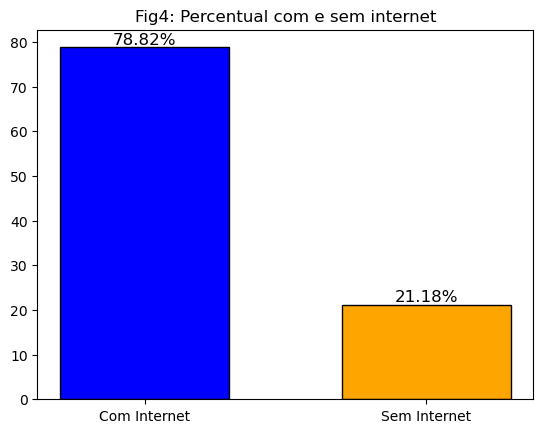

In [440]:
percentual_internet = (df['Servico_Internet']=='0').value_counts(normalize=True) * 100
plt.bar(percentual_internet.index, percentual_internet.values, color=['blue', 'orange'], edgecolor='black', width=0.6)
plt.title('Fig4: Percentual com e sem internet')

plt.xticks([0, 1],['Com Internet', 'Sem Internet'])
for i in range(2):
    plt.text(i, percentual_internet.values[i] , f'{percentual_internet.values[i]:.2f}%', ha='center', va='bottom', fontsize=12)
plt.show()

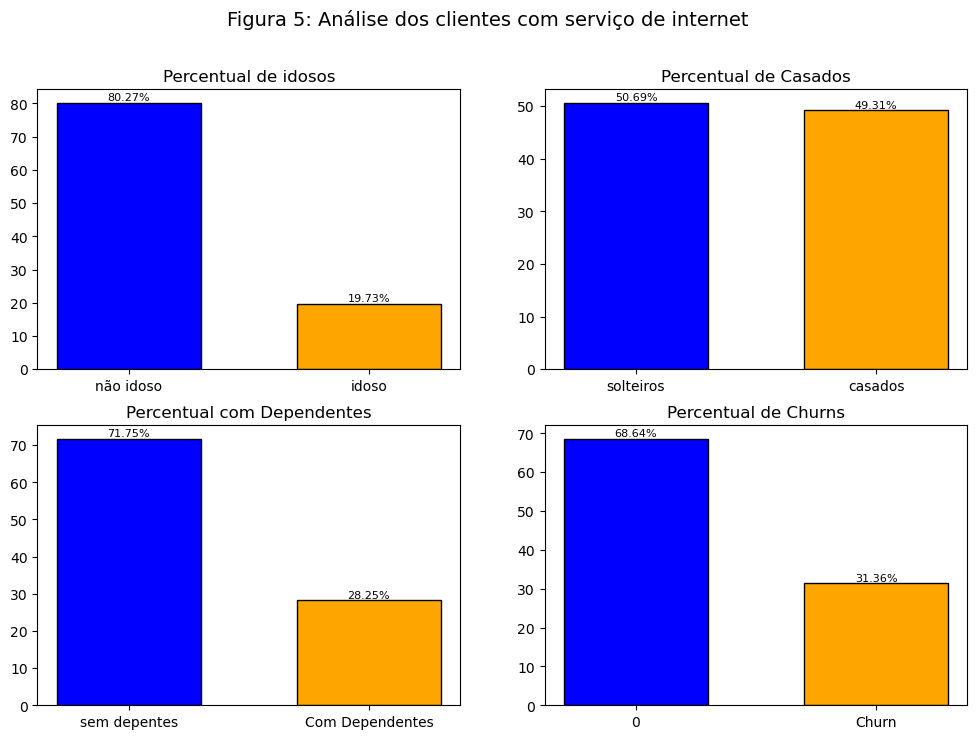

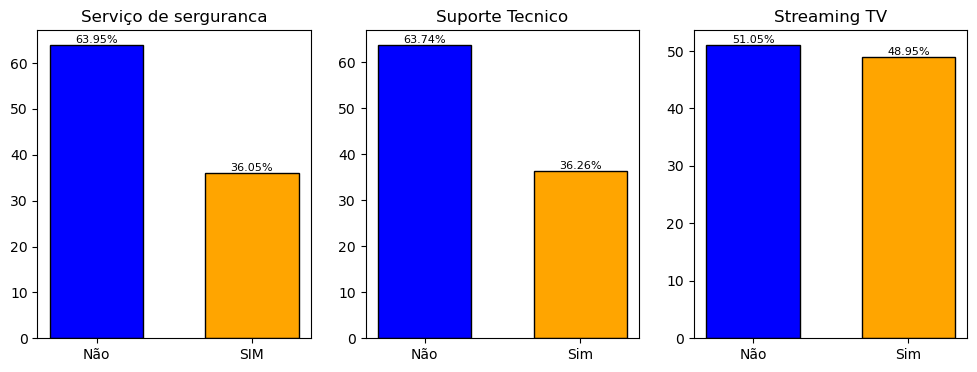

In [441]:
#Com Internet
dfi=df[df['Servico_Internet']!='0'] #Filtragem

fig, ax = plt.subplots(2, 2, figsize=(12, 8))  # 2 linhas, 2 colunas
fig.suptitle('Figura 5: Análise dos clientes com serviço de internet', fontsize=14)

percentual1 = dfi['Idoso'].value_counts(normalize=True) * 100
percentual2 = dfi['Casado'].value_counts(normalize=True) * 100
percentual3 = dfi['Dependents'].value_counts(normalize=True) * 100
percentual4 = dfi['Servico_Seguranca'].value_counts(normalize=True) * 100
percentual5 = dfi['Suporte_Tecnico'].value_counts(normalize=True) * 100
percentual6 = dfi['StreamingTV'].value_counts(normalize=True) * 100
percentual7 = dfi['Churn'].value_counts(normalize=True) * 100

#grupo 2x2 ( idosos, casados, dependentes,churns)
# Plotar o histograma com percentuais
ax[0,0].bar(percentual1.index, percentual1.values, color=['blue', 'orange'], edgecolor='black', width=0.6)
ax[0,0].set_title('Percentual de idosos')
ax[0,0].set_xticks([0, 1])
ax[0,0].set_xticklabels(['não idoso', 'idoso'])
for i in range(2):
    ax[0,0].text(i, percentual1.values[i] , f'{percentual1.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)

ax[0,1].bar(percentual2.index, percentual2.values, color=['blue', 'orange'], edgecolor='black', width=0.6)
ax[0,1].set_title('Percentual de Casados')
ax[0,1].set_xticks([0, 1])
ax[0,1].set_xticklabels(['solteiros', 'casados'])
for i in range(2):
    ax[0,1].text(i, percentual2.values[i] , f'{percentual2.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)

ax[1,0].bar(percentual3.index, percentual3.values, color=['blue', 'orange'], edgecolor='black', width=0.6)
ax[1,0].set_title('Percentual com Dependentes')
ax[1,0].set_xticks([0, 1])
ax[1,0].set_xticklabels(['sem depentes', 'Com Dependentes'])
for i in range(2):
    ax[1,0].text(i, percentual3.values[i] , f'{percentual3.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)

ax[1,1].bar(percentual7.index, percentual7.values, color=['blue', 'orange'], edgecolor='black', width=0.6)
ax[1,1].set_title('Percentual de Churns')
ax[1,1].set_xticks([0, 1])
ax[1,1].set_xticklabels(['0', 'Churn'])
for i in range(2):
    ax[1,1].text(i, percentual7.values[i] , f'{percentual7.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)


##grupo 1x3 (Servico_Seguranca,	Suporte_Tecnico,	StreamingTV)

fig2, ax = plt.subplots(1, 3, figsize=(12, 4))  # 1 linhas, 3 colunas
ax[0].bar(percentual4.index, percentual4.values, color=['blue', 'orange'], edgecolor='black', width=0.6)
ax[0].set_title('Serviço de serguranca')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['Não', 'SIM'])
for i in range(2):
    ax[0].text(i, percentual4.values[i] , f'{percentual4.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)

ax[1].bar(percentual5.index, percentual5.values, color=['blue', 'orange'], edgecolor='black', width=0.6)
ax[1].set_title('Suporte Tecnico')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['Não', 'Sim'])
for i in range(2):
    ax[1].text(i, percentual5.values[i] , f'{percentual5.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)

ax[2].bar(percentual6.index, percentual6.values, color=['blue', 'orange'], edgecolor='black', width=0.6)
ax[2].set_title('Streaming TV')
ax[2].set_xticks([0, 1])
ax[2].set_xticklabels(['Não', 'Sim'])
for i in range(2):
    ax[2].text(i, percentual6.values[i] , f'{percentual6.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)
plt.show()

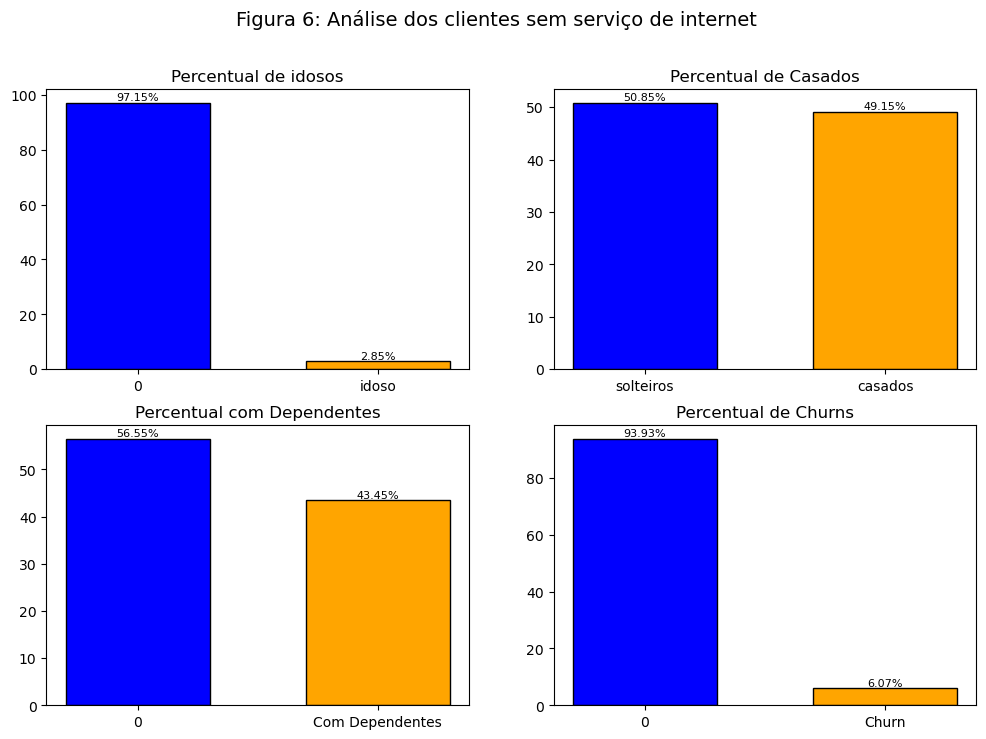

In [442]:
#Filtragem Sem Internet
dfs=df[df['Servico_Internet']=='0'] #dataset sem internet

percentual1s = dfs['Idoso'].value_counts(normalize=True) * 100
percentual2s = dfs['Casado'].value_counts(normalize=True) * 100
percentual3s = dfs['Dependents'].value_counts(normalize=True) * 100
percentual4s = dfs['Servico_Seguranca'].value_counts(normalize=True) * 100
percentual5s = dfs['Suporte_Tecnico'].value_counts(normalize=True) * 100
percentual6s = dfs['StreamingTV'].value_counts(normalize=True) * 100
percentual7s = dfs['Churn'].value_counts(normalize=True) * 100
fig, ax = plt.subplots(2, 2, figsize=(12, 8))  # 2 linhas, 2 colunas
fig.suptitle('Figura 6: Análise dos clientes sem serviço de internet', fontsize=14)

ax[0,0].bar(percentual1s.index, percentual1s.values, color=['blue', 'orange'], edgecolor='black', width=0.6)
ax[0,0].set_title('Percentual de idosos')
ax[0,0].set_xticks([0, 1])
ax[0,0].set_xticklabels(['0', 'idoso'])
for i in range(2):
    ax[0,0].text(i, percentual1s.values[i] , f'{percentual1s.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)

ax[0,1].bar(percentual2s.index, percentual2s.values, color=['blue', 'orange'], edgecolor='black', width=0.6)
ax[0,1].set_title('Percentual de Casados')
ax[0,1].set_xticks([0, 1])
ax[0,1].set_xticklabels(['solteiros', 'casados'])
for i in range(2):
    ax[0,1].text(i, percentual2s.values[i] , f'{percentual2s.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)

ax[1,0].bar(percentual3s.index, percentual3s.values, color=['blue', 'orange'], edgecolor='black', width=0.6)
ax[1,0].set_title('Percentual com Dependentes')
ax[1,0].set_xticks([0, 1])
ax[1,0].set_xticklabels(['0', 'Com Dependentes'])
for i in range(2):
    ax[1,0].text(i, percentual3s.values[i] , f'{percentual3s.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)

ax[1,1].bar(percentual7s.index, percentual7s.values, color=['blue', 'orange'], edgecolor='black', width=0.6)
ax[1,1].set_title('Percentual de Churns')
ax[1,1].set_xticks([0, 1])
ax[1,1].set_xticklabels(['0', 'Churn'])
for i in range(2):
    ax[1,1].text(i, percentual7s.values[i] , f'{percentual7s.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)

#### 3) Colunas Categoricas(strings)

A distribuição de gênero entre os clientes está equilibrada, com 51% sendo homens e 49% mulheres. Em relação ao serviço de internet, a maioria dos clientes utiliza fibra óptica (44,98%), seguida pelo DSL (33,84%), enquanto 21,18% não possuem serviço de internet. Quanto ao tipo de contrato, 55,02% optam pelo plano mensal, enquanto 24,2% escolhem um contrato de dois anos e 20,78% um contrato de um ano.
No que diz respeito aos métodos de pagamento, o cheque eletrônico é o mais utilizado (33,36%), seguido por transferência bancária automática (23,27%) e cartão de crédito automático (22,15%) e  cheque físico (21,22% ). A priori, essas informações dão indicativos da preferência pelo plano curtos, internet de fibra Opitica e contratos curtos( mensais). Em relação aos método de pagamento, estão bem distribuidos como uma ligeira tendencia a preferencia por cheque eletrônico. Esses resultados estão organizados na tabela 5 e nos gráficos da figura 7


| Categoria          | Opção                        | Proporção (%) |
|--------------------|-----------------------------|--------------|
| **Gênero**        | Masculino                    | 51.00        |
|                   | Feminino                     | 48.99        |
| **Serviço Internet** | Fibra Óptica                | 44.98        |
|                   | DSL                          | 33.84        |
|                   | Sem Internet                 | 21.18        |
| **Tipo de Contrato** | Mensal                     | 55.02        |
|                   | Dois anos                    | 24.20        |
|                   | Um ano                       | 20.78        |
| **Método de Pagamento** | Cheque Eletrônico        | 33.36        |
|                   | Transferência Bancária       | 23.27        |
|                   | Cartão de Crédito            | 22.15        |
|                   | Cheque Físico                | 21.22        |
**Tabela 7**.Resumo estatistico

Observação. A primeira coluna **customerID** é a própria identificação do cliente.

/tmp/ipykernel_412899/4164706048.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(percentuald.index, rotation=45, ha="right")


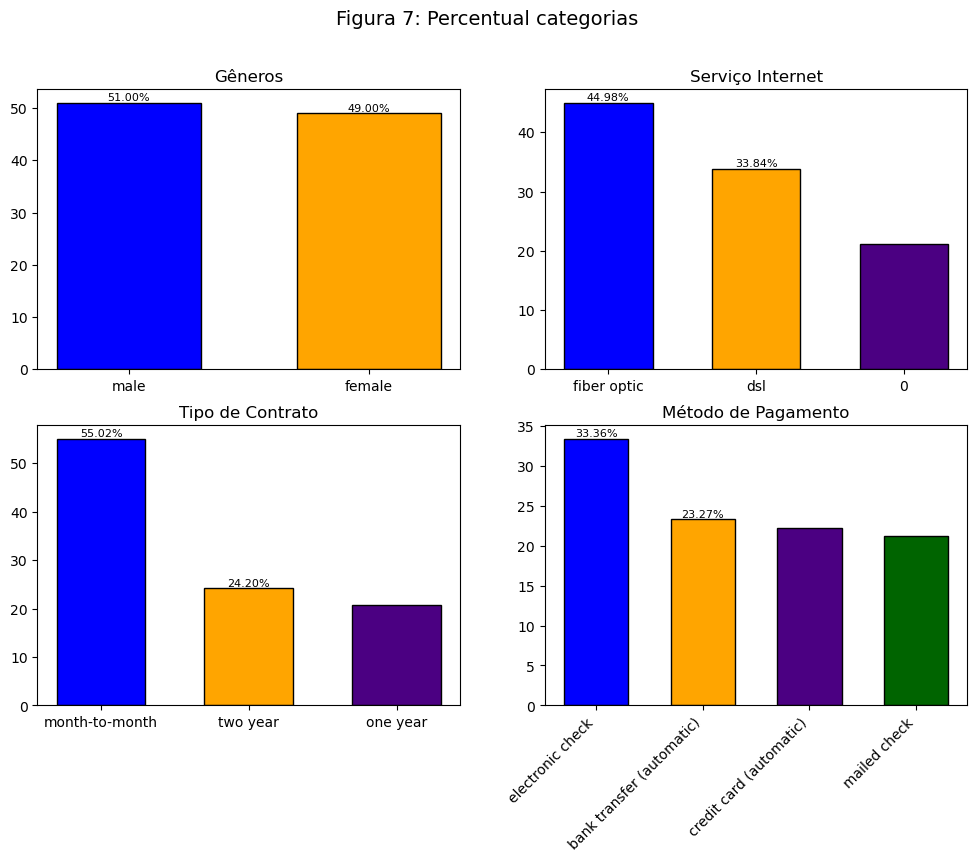

In [444]:
df['PaymentMethod'].value_counts()
percentuala = df['Genero'].value_counts(normalize=True) * 100
percentualb = df['Servico_Internet'].value_counts(normalize=True) * 100
percentualc = df['Tipo_Contrato'].value_counts(normalize=True) * 100
percentuald = df['PaymentMethod'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(2, 2, figsize=(12, 8))  # 2 linhas, 2 colunas
fig.suptitle('Figura 7: Percentual categorias', fontsize=14)
ax[0,0].bar(percentuala.index, percentuala.values, color=['blue', 'orange','indigo'], edgecolor='black', width=0.6)
ax[0,0].set_title('Gêneros')
for i in range(2):
    ax[0,0].text(i, percentuala.values[i] , f'{percentuala.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)

ax[0,1].bar(percentualb.index, percentualb.values, color=['blue', 'orange','indigo'], edgecolor='black', width=0.6)
ax[0,1].set_title('Serviço Internet')
for i in range(2):
    ax[0,1].text(i, percentualb.values[i] , f'{percentualb.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)

ax[1,0].bar(percentualc.index, percentualc.values, color=['blue', 'orange','indigo'], edgecolor='black', width=0.6)
ax[1,0].set_title('Tipo de Contrato')
for i in range(2):
    ax[1,0].text(i, percentualc.values[i] , f'{percentualc.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)

ax[1,1].bar(percentuald.index, percentuald.values, color=['blue', 'orange','indigo','darkgreen'], edgecolor='black', width=0.6)
ax[1,1].set_title('Método de Pagamento')
ax[1,1].set_xticklabels(percentuald.index, rotation=45, ha="right") 
for i in range(2):
    ax[1,1].text(i, percentuald.values[i] , f'{percentuald.values[i]:.2f}%', ha='center', va='bottom', fontsize=8)

# 3) Identifique e trate as colunas que contém outliers.
Não foi encontrado, ou classificado, nenhum dado como outlier. Alguns comentários sobre cada grupo abaixo. O resumo estatisco desses dados já foram apresentados na [tabela 2](#tabela-exemplo) 


- **Tempo como cliente:**\
A variável "Meses como Cliente" apresenta uma grande variação entre os clientes. A média é de 32.35 meses, enquanto o desvio padrão de 24,64 meses, indicando que esse tempo dos clientes está disperso na distribuição. A distribuição é assimétrica, com 25% dos clientes tendo menos de 8 meses, a mediana sendo ~29 meses, e 75% dos clientes tendo até 56 meses. O maximo de clientes registrado é 72 meses. Observamos ainda um numero consideravel nos primeiros meses, inclusive uma moda em 1 mês( 214 registros). Algums possibilidades para esse moda em 1 mês são clintes que assinam e cancelam rapidamente.  

- **Total pago:**\
A variável "Total Pago" apresenta uma grande variação nos valores pagos pelos clientes. A média é de 2290,09, mas o desvio padrão de 2264,59 indicanso uma alta dispersão dos dados, sugerindo que há clientes com gastos muito distintos. O menor valor pago é 18,80, enquanto o máximo chega a 8564,75, mostrando que alguns clientes pagaram valores significativamente mais altos. O primeiro quartil (25%) é 402,34, ou seja, 25% dos clientes pagaram até esse valor. A mediana (50%) é 1402,90, o que significa que metade dos clientes pagou menos que isso e a outra metade pagou mais. O terceiro quartil (75%) é 3867,16, indicando que a maioria dos clientes pagou bem abaixo do valor máximo.
A moda é 20,2, ou seja, esse é o valor mais comum de pagamento entre os clientes, porém ocorreu apenas 5 vezes.A Alta variabilidade pode ser compreendida por conta deste resultado ser a soma individual dos pagamentos tanto de clientes novo como antigo, desta forma é compreensivel encontre valores altos para pgamento total de clientes mais antigos, assim como pagamentos mais baixo para novos clientes. Um sugestão é agrupar total_pago com tempo de cada clientes para melhor buscar entende melhor o perfil de clientes aqui. 

- **Pagamento Mensal:**\
 A média para pagamentos mensais é 66,34 e o desvio padrão de 28,05. Observamos que o menor pagamento é 
 é 18,40 ( muito próximo encontrado ao pagamento total), enquanto o máximo chega a 118,65. Essa variação de preços podem indicar diferentes tipos de plano e serviço. O primeiro quartil (25%) é 45,40, indicando que 25% dos clientes pagam até esse valor. A mediana (50%) é 71,45, ou seja, metade dos clientes paga até esse valor e a outra metade paga mais. O terceiro quartil (75%) é 87,71, mostrando que a maioria paga abaixo do valor máximo.
A moda é 71,45, ocorrendo 314 vezes, o que significa que esse é o valor mais comum de pagamento mensal entre os clientes. Como a mediana e a moda são iguais, a distribuição parece estar concentrada em torno desse valor, sugerindo que muitos clientes compartilham um plano ou pacote de serviços semelhante. 


meses como cliente
moda : 1, Frequência: 214
count    2488.000000
mean       32.352090
std        24.636885
min         0.000000
25%         8.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: Tempo_como_Cliente, dtype: float64
Total Pago
Moda : 20.2, Frequência: 5
count    2488.000000
mean     2290.087178
std      2264.585643
min        18.800000
25%       402.337500
50%      1402.900000
75%      3867.162500
max      8564.750000
Name: Total_Pago, dtype: float64
Pagamento Mensal
Moda: 71.45, Frequência: 314
count    2488.000000
mean       66.342564
std        28.051718
min        18.400000
25%        45.400000
50%        71.450000
75%        87.712500
max       118.650000
Name: Pagamento_Mensal, dtype: float64


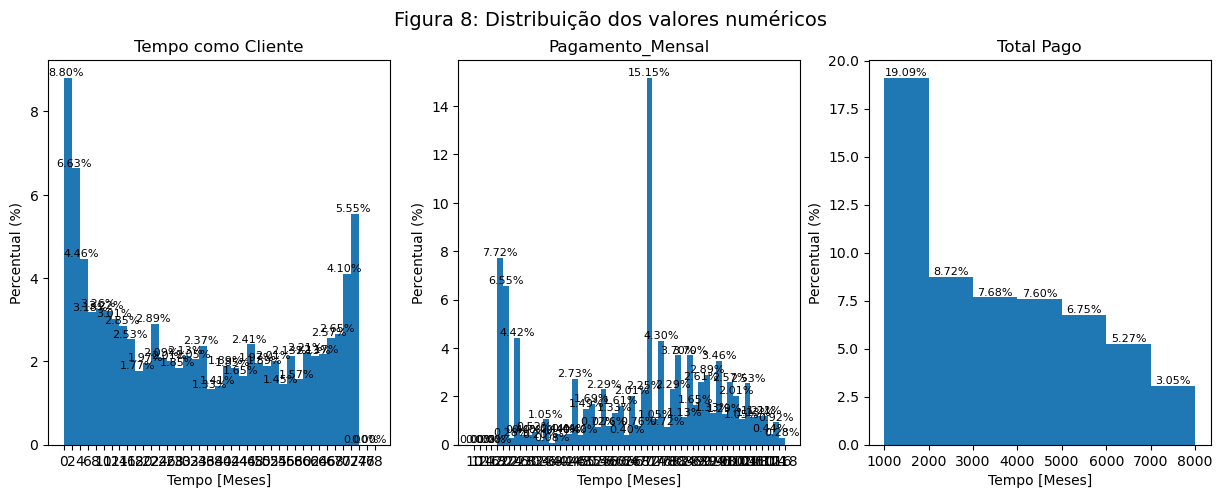

In [497]:
# moda = df['Tempo_como_Cliente'].mode()[0]  # Encontrar a moda
# frequencia = (df['Tempo_como_Cliente'] == moda).sum()  # Contar quantas vezes a moda aparece
# print('meses como cliente')
# print(f'moda : {moda}, Frequência: {frequencia}')
# print(df['Tempo_como_Cliente'].describe())
# moda = df['Total_Pago'].mode()[0]  # Encontrar a moda
# frequencia = (df['Total_Pago'] == moda).sum()  # Contar quantas vezes a moda aparece
# print('Total Pago')
# print(f'Moda : {moda}, Frequência: {frequencia}')
# print(df['Total_Pago'].describe())

# moda = df['Pagamento_Mensal'].mode()[0]  # Encontrar a moda
# frequencia = (df['Pagamento_Mensal'] == moda).sum()  # Contar quantas vezes a moda aparece
# print('Pagamento Mensal')
# print(f'Moda: {moda}, Frequência: {frequencia}')
# print(df['Pagamento_Mensal'].describe())


fig, ax = plt.subplots(1, 3, figsize=(15, 5)) 
fig.suptitle('Figura 8: Distribuição dos valores numéricos', fontsize=14)

temp=df['Tempo_como_Cliente']
bins=np.arange(0,80,2)

c, x= np.histogram(temp, bins)
N=len(df)
p=c/N*100
ax[0].bar(x[0:-1], p, width=np.diff(bins), align='edge')  
ax[0].set_title('Tempo como Cliente')
ax[0].set_xlabel('Tempo [Meses]')
ax[0].set_ylabel('Percentual (%)')
ax[0].set_xticks(bins)
for i in range(len(c)):
    ax[0].text(x[i]+0.5, p[i] , f'{p[i]:.2f}%', ha='center', va='bottom', fontsize=8)


temp=df['Pagamento_Mensal']
bins=np.arange(10,120,2)
c, x= np.histogram(temp, bins)
N=len(df)
p=c/N*100
ax[1].bar(x[0:-1], p, width=np.diff(bins), align='edge')  
ax[1].set_title('Pagamento_Mensal')
ax[1].set_xlabel('Tempo [Meses]')
ax[1].set_ylabel('Percentual (%)')
ax[1].set_xticks(bins)
for i in range(len(c)):
    ax[1].text(x[i]+1, p[i] , f'{p[i]:.2f}%', ha='center', va='bottom', fontsize=8)

temp=df['Total_Pago']
bins=np.arange(1000,9000,1000)
c, x= np.histogram(temp, bins)
N=len(df)
p=c/N*100
ax[2].bar(x[0:-1], p, width=np.diff(bins), align='edge')  
ax[2].set_title('Total Pago')
ax[2].set_xlabel('Tempo [Meses]')
ax[2].set_ylabel('Percentual (%)')
ax[2].set_xticks(bins)
for i in range(len(c)):
    ax[2].text(x[i]+500, p[i] , f'{p[i]:.2f}%', ha='center', va='bottom', fontsize=8)
    

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

In [364]:
#Seu código aqui